# Machine Learning Project : Loan Eligibility Prediction :

- ### Write a program that takes in data on loan applicants as input and uses machine learning algorithms to predict whether or not a user is eligible for a loan. The program should be able to handle various factors such as employment history, income, education, credit history, etc. and use this information to train multiple machine learning models.

- ### Your task is to compare the accuracy of different models for predicting loan eligibility based on the available data. Once you have chosen an algorithm with good performance, your next step would be training the model using available data and then evaluating its performance on the test set.
---
# Importing modules :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading training and testing datasets into pandas dataframes named **data_train** and **data_test** :

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/Data_Science/Projects/ML Projects/Datasets/loan-train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/Data_Science/Projects/ML Projects/Datasets/loan-test.csv")
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Checking details of columns in training dataset :

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking null values :

In [ ]:
data_train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# Checking number of rows and columns in the training data :

In [ ]:
data_train.shape

(614, 13)

### As we have only 614 rows in the data which is not enough to train an algorithm entirely. So we need to make sure we don't drop any more rows to remove null values.
---
# **Filling null values of columns using mean, median or mode :**
- ### The **mean** is the average of a dataset. The **median** is the central data point in a dataset that is ordered from least to greatest. The mode is the data point that occurs most frequently in a dataset.

- ### We should replace null values with the mean for data that is normally distributed. If the data is skewed, we should use the median. If the data is categorical, we should use the **mode**. Replacing null values with these metrics helps to prevent data loss.

# **We can determine whether to use the mean or median by looking at the skewness :**

- ### Running the code data_train **'[LoanAmount].skew()'** to see the skewness.
- ### If the skewness is between -0.5 and 0.5, the data is fairly symmetrical and we should use the mean.
- ### If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data is moderately skewed and we should use the median.
- ### If the skewness is less than -1 or greater than 1, the data is highly skewed and we should use the median.

<ipython-input-95-4a41988f9435>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['LoanAmount'])


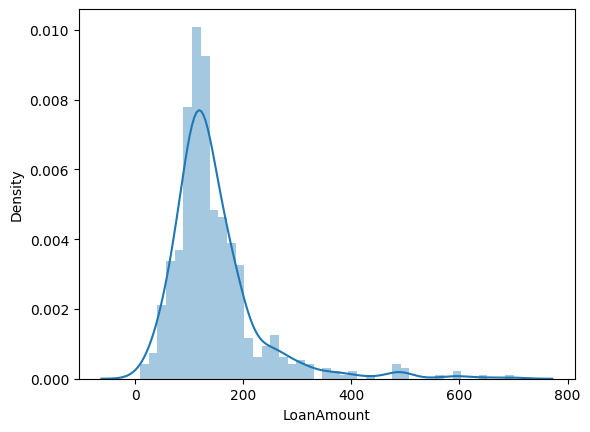

2.677551679256059

In [ ]:
sns.distplot(data_train['LoanAmount'])
plt.show()
data_train['LoanAmount'].skew()

## The skewness is greater than 1, so the data is highly skewed. We should use the median to replace null values in the LoanAmount column because :
- ### Mean is sensitive to outliers : In skewed data, the mean is pulled towards the long tail of the distribution. This can give a misleading representation of the typical value.
- ### Median is robust to outliers : The median is not affected by outliers, as it only considers the central position of the data.
- ### Therefore, for our **LoanAmount** column, using the **median** will provide a more representative value for filling nulls and avoid the influence of potential outliers.

In [ ]:
data_train['Loan_Amount_Term'].skew()

-2.362414124216269

## The skewness of **'Loan_Amount_Term'** is -2.36, which indicates that the data is highly skewed.

- ### Since the data is highly skewed, using the **median** would be a more appropriate choice for filling null values.

In [ ]:
data_train['Gender'].fillna(data_train['Gender'].mode()[0], inplace = True)
data_test['Gender'].fillna(data_test['Gender'].mode()[0], inplace = True)

data_train['Dependents'].fillna(data_train['Dependents'].mode()[0], inplace = True)
data_test['Dependents'].fillna(data_test['Dependents'].mode()[0], inplace = True)

data_train['Married'].fillna(data_train['Married'].mode()[0], inplace = True)
data_test['Married'].fillna(data_test['Married'].mode()[0], inplace = True)

data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace = True)
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0], inplace = True)

data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace = True)
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(), inplace = True)

data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].median(), inplace = True)
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].median(), inplace = True)

data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0], inplace = True)
data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0], inplace = True)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data_train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


### So now we have no null values in any columns.
---
## Below code calculates the total income for loan applicants by adding their applicant income and co-applicant income. It does this for both the training dataset **(data_train)** and the testing dataset **(data_test)**.

- ## The result is stored in a new column called **'TotalIncome'** in each dataset.

In [ ]:
data_train['TotalIncome'] = data_train['ApplicantIncome'] + data_train['CoapplicantIncome']
data_test['TotalIncome'] = data_test['ApplicantIncome'] + data_test['CoapplicantIncome']

In [ ]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276


# Using Label Encoding to convert categorical columns in **data_train** and **data_test** into numerical representation :

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data_train['Gender'] = encoder.fit_transform(data_train['Gender'])
data_train['Married'] = encoder.fit_transform(data_train['Married'])
data_train['Education'] = encoder.fit_transform(data_train['Education'])
data_train['Self_Employed'] = encoder.fit_transform(data_train['Self_Employed'])
data_train['Property_Area'] = encoder.fit_transform(data_train['Property_Area'])
data_train['Loan_Status'] = encoder.fit_transform(data_train['Loan_Status'])
data_train['Dependents'] = encoder.fit_transform(data_train['Dependents'])

data_test['Gender'] = encoder.fit_transform(data_test['Gender'])
data_test['Married'] = encoder.fit_transform(data_test['Married'])
data_test['Education'] = encoder.fit_transform(data_test['Education'])
data_test['Self_Employed'] = encoder.fit_transform(data_test['Self_Employed'])
data_test['Property_Area'] = encoder.fit_transform(data_test['Property_Area'])
data_test['Dependents'] = encoder.fit_transform(data_test['Dependents'])

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  TotalIncome        614 non-null    float64
dtypes: float64(5), int64(8), object(1)
memory usage: 67.3+ KB


# Calculating the correlation matrix of **data_train** and displays it as a heatmap using seaborn :

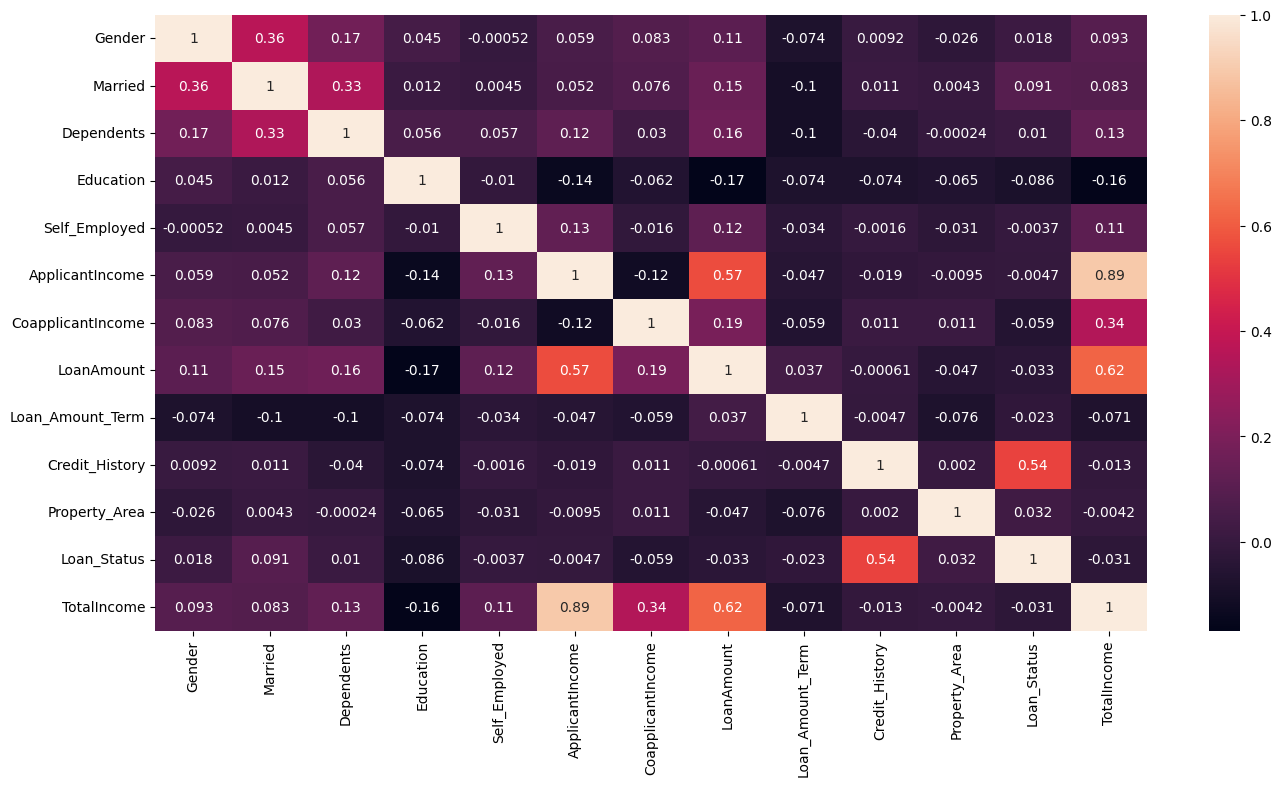

In [ ]:
correlation_matrix = data_train.corr(numeric_only = True)
plt.figure(figsize = (16,8))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

### The heatmap shows that **Credit_History** has the highest positive correlation with **Loan_Status** (0.54). This suggests that applicants with a good credit history are more likely to have their loans approved.

- ### Other variables that are positively correlated include **Married** (0.09), and **Property_Area** (0.03), although these correlations are quite weak.

- ### On the other hand, the heatmap also reveals negative correlations between **Loan_Status** and variables such as **Gender** (-0.02), **Dependents** (-0.02), and **Education** (-0.09). However, these correlations are also very weak, suggesting a minimal impact on loan approval.
---
# Preparing training and testing datasets :

In [ ]:
x_train = data_train.drop(['Loan_ID'], axis = 1)
y_train = data_train[['Loan_Status']]

x_test = data_train.drop(['Loan_ID'], axis = 1)
y_test = data_train[['Loan_Status']]

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
 12  TotalIncome        367 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 37.4+ KB


# Scaling features :
## Scaling our features might improve the performance of Logistic Regression, but it's not necessary for Decision Tree or Random Forest. Here's why:

- ### **Logistic Regression :** Logistic Regression uses gradient descent, which can be sensitive to feature scales. Scaling ensures that all features contribute equally to the model.

- ### **Decision Tree and Random Forest :** These models are based on decision rules that split data based on feature values. **The scale of the features doesn't affect the splits.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializes the scaler :
scaler = StandardScaler()

# Fits and transforms the training data :
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data (using the same scaler)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)
print("Logistic Regression Accuracy :", lr.score(x_test_scaled, y_test))

Logistic Regression Accuracy : 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree Classifier :

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)
print("Decision Tree Classifier Accuracy :", dtc.score(x_test, y_test))

Decision Tree Classifier Accuracy : 1.0


# Random Forest Classifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
print("Random Forest Classifier Accuracy :", rfc.score(x_test, y_test))

Random Forest Classifier Accuracy : 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## As we can see all 3 models are perfect for this data.